In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\foooo\Datascincecamp\Usecase-7\df_att.csv")

In [3]:
# I want get nathonalty

In [4]:
df.shape

(2804, 23)

In [5]:
df.head(2)

,Unnamed: 0,player,team,name,position,height,age,appearance,goals,assists,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,23,/marcus-rashford/profil/spieler/258923,Manchester United,Marcus Rashford,Attack-LeftWinger,185.0,25.0,88,0.52879,0.196408,...,0.0,0.0,5957,319,35,9,80000000,85000000,4,1
1,24,/jadon-sancho/profil/spieler/401173,Manchester United,Jadon Sancho,Attack-LeftWinger,180.0,23.0,79,0.21978,0.109890,...,0.0,0.0,4914,173,32,5,55000000,130000000,4,1


In [6]:
df.columns

Index(['Unnamed: 0', 'player', 'team', 'name', 'position', 'height', 'age',
       'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards',
       'red cards', 'goals conceded', 'clean sheets', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value', 'position_encoded', 'winger'],
      dtype='object')

In [7]:
df.drop('Unnamed: 0',axis=1, inplace= True)

In [8]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [9]:
df_copy = df.copy()

In [10]:
df_copy['team'].unique()

array(['Manchester United', 'West Ham United', 'Leicester City',
       'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
       'Brighton &amp; Hove Albion', 'Everton FC', 'Nottingham Forest',
       'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
       'Brentford FC', 'Liverpool FC', 'Newcastle United',
       'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
       'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
       '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
       'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt',
       'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
       'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF',
       'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
       'Rayo Vallecano', 'RCD Mallorca', 'UD Almería',

In [11]:
len(df_copy['team'].unique())

374

In [12]:


# الدوري الإنجليزي الممتاز (Premier League)
premier_league = [
    'Manchester United', 'West Ham United', 'Leicester City',
    'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
    'Brighton & Hove Albion', 'Everton FC', 'Nottingham Forest',
    'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
    'Brentford FC', 'Liverpool FC', 'Newcastle United', 'Manchester City',
    'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC'
]

# الدوري الألماني (Bundesliga)
bundesliga = [
    'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
    '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart', '1.FSV Mainz 05',
    '1.FC Köln', 'Hertha BSC', 'FC Schalke 04', 'VfL Bochum', 'SV Werder Bremen',
    'Eintracht Frankfurt', 'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
    'Bayern Munich', 'RB Leipzig'
]

# الدوري الإسباني (La Liga)
la_liga = [
    'Real Sociedad', 'Villarreal CF', 'Real Betis Balompié', 'Athletic Bilbao',
    'Valencia CF', 'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
    'Rayo Vallecano', 'RCD Mallorca', 'UD Almería', 'Real Valladolid CF',
    'Cádiz CF', 'Elche CF', 'RCD Espanyol Barcelona', 'Getafe CF',
    'Atlético de Madrid', 'Real Madrid', 'FC Barcelona'
]

# الدوري الإيطالي (Serie A)
serie_a = [
    'AS Roma', 'SS Lazio', 'ACF Fiorentina', 'US Sassuolo', 'Torino FC',
    'Udinese Calcio', 'Bologna FC 1909', 'AC Monza', 'FC Empoli',
    'US Lecce', 'Spezia Calcio', 'Hellas Verona', 'UC Sampdoria',
    'US Cremonese', 'US Salernitana 1919', 'Atalanta BC', 'SSC Napoli',
    'Inter Milan', 'AC Milan', 'Juventus FC'
]

# الدوري الفرنسي (Ligue 1)
ligue_1 = [
    'AS Monaco', 'Stade Rennais FC', 'Olympique Marseille', 'OGC Nice',
    'RC Lens', 'FC Nantes', 'Montpellier HSC', 'FC Lorient', 'FC Toulouse',
    'ESTAC Troyes', 'Stade Brestois 29', 'Angers SCO', 'AJ Auxerre',
    'Clermont Foot 63', 'AC Ajaccio', 'Olympique Lyon', 'LOSC Lille',
    'Stade Reims', 'RC Strasbourg Alsace', 'Paris Saint-Germain'
]

# الدوري الهولندي (Eredivisie)
eredivisie = [
    'AZ Alkmaar', 'Twente Enschede FC', 'Vitesse Arnhem', 'FC Groningen',
    'Fortuna Sittard', 'NEC Nijmegen', 'Sparta Rotterdam',
    'SC Cambuur Leeuwarden', 'Excelsior Rotterdam', 'FC Volendam',
    'RKC Waalwijk', 'FC Emmen', 'Go Ahead Eagles', 'FC Utrecht',
    'SC Heerenveen', 'Ajax Amsterdam', 'PSV Eindhoven', 'Feyenoord Rotterdam'
]

# الدوري البرازيلي (Brasileirão)
brasileirao = [
    'Club Athletico Paranaense', 'Red Bull Bragantino', 'Santos FC',
    'Clube de Regatas Vasco da Gama', 'Fluminense Football Club',
    'Sport Club Internacional', 'Esporte Clube Bahia',
    'Grêmio Foot-Ball Porto Alegrense', 'Coritiba Foot Ball Club',
    'Fortaleza Esporte Clube', 'Cruzeiro Esporte Clube', 'Goiás Esporte Clube',
    'Cuiabá Esporte Clube (MT)', 'Botafogo de Futebol e Regatas',
    'Clube Atlético Mineiro', 'São Paulo Futebol Clube',
    'América Futebol Clube (MG)', 'Sociedade Esportiva Palmeiras',
    'CR Flamengo', 'Sport Club Corinthians Paulista'
]

# الدوري البرتغالي (Primeira Liga)
primeira_liga = [
    'SC Braga', 'FC Famalicão', 'Vitória Guimarães SC', 'CD Santa Clara',
    'GD Estoril Praia', 'Boavista FC', 'Portimonense SC', 'CS Marítimo',
    'Casa Pia AC', 'FC Paços de Ferreira', 'FC Arouca', 'FC Vizela',
    'Rio Ave FC', 'GD Chaves', 'Gil Vicente FC', 'FC Porto', 'Sporting CP',
    'SL Benfica'
]

# الدوري المكسيكي (Liga MX)
liga_mx = [
    'Santos Laguna', 'Club León FC', 'FC Juárez', 'Club Tijuana',
    'Atlético de San Luis', 'Club Necaxa', 'Puebla FC', 'Mazatlán FC',
    'Querétaro FC', 'CF América', 'CF Monterrey', 'Atlas Guadalajara',
    'UNAM Pumas', 'Deportivo Toluca', 'Tigres UANL', 'Deportivo Guadalajara',
    'CD Cruz Azul', 'CF Pachuca'
]

# الدوري الروسي (Russian Premier League)
russian_premier_league = [
    'Dynamo Moscow', 'Lokomotiv Moscow', 'FK Rostov', 'Krylya Sovetov Samara',
    'FC Sochi', 'Akhmat Grozny', 'Ural Yekaterinburg', 'FK Orenburg',
    'FC Pari Nizhniy Novgorod', 'FK Khimki', 'Torpedo Moscow', 'Fakel Voronezh',
    'Spartak Moscow', 'CSKA Moscow', 'FK Krasnodar', 'Zenit St. Petersburg'
]

# الدوري الإنجليزي الدرجة الأولى (Championship)
championship = [
    'West Bromwich Albion', 'Sunderland AFC', 'Hull City', 'Preston North End',
    'Stoke City', 'Queens Park Rangers', 'Birmingham City', 'Cardiff City',
    'Millwall FC', 'Reading FC', 'Blackpool FC', 'Bristol City',
    'Huddersfield Town', 'Rotherham United', 'Wigan Athletic',
    'Middlesbrough FC', 'Coventry City', 'Luton Town', 'Swansea City',
    'Burnley FC', 'Watford FC', 'Sheffield United', 'Blackburn Rovers',
    'Norwich City'
]

# الدوري التركي (Süper Lig)
super_lig = [
    'Trabzonspor', 'Besiktas JK', 'Basaksehir FK', 'Antalyaspor',
    'Adana Demirspor', 'Alanyaspor', 'Kasimpasa', 'Konyaspor',
    'MKE Ankaragücü', 'Sivasspor', 'Kayserispor', 'Giresunspor',
    'Istanbulspor', 'Hatayspor', 'Gaziantep FK', 'Fatih Karagümrük',
    'Ümraniyespor', 'Fenerbahce', 'Galatasaray'
]

# الدوري النمساوي (Austrian Bundesliga)
austrian_bundesliga = [
    'SK Sturm Graz', 'LASK', 'SCR Altach', 'SC Austria Lustenau', 'SV Ried',
    'TSV Hartberg', 'WSG Tirol', 'Rapid Vienna', 'Austria Vienna',
    'SK Austria Klagenfurt', 'Wolfsberger AC', 'Red Bull Salzburg'
]

# الدوري الأمريكي (Major League Soccer - MLS)
mls = [
    'Philadelphia Union', 'FC Cincinnati', 'FC Dallas', 'Orlando City SC',
    'Los Angeles Galaxy', 'New England Revolution', 'D.C. United',
    'New York Red Bulls', 'Portland Timbers', 'Columbus Crew', 'Charlotte FC',
    'Sporting Kansas City', 'Colorado Rapids', 'Vancouver Whitecaps FC',
    'Chicago Fire FC', 'Inter Miami CF', 'Minnesota United FC',
    'Houston Dynamo FC', 'St. Louis CITY SC', 'CF Montréal', 'Real Salt Lake City',
    'Nashville SC', 'San Jose Earthquakes', 'Seattle Sounders FC',
    'Atlanta United FC', 'New York City FC', 'Austin FC', 'Los Angeles FC',
    'Toronto FC'
]

# الدوري الأرجنتيني (Argentine Primera División)
argentine_primera = [
    'CA Vélez Sarsfield', 'CA San Lorenzo de Almagro', 'Club Atlético Lanús',
    'Defensa y Justicia', 'Club Estudiantes de La Plata', "CA Newell's Old Boys",
    'CA Colon', 'CA Rosario Central', 'CA Banfield',
    'Club de Gimnasia y Esgrima La Plata', 'Club Atlético Tucumán',
    'CD Godoy Cruz Antonio Tomba', 'Club Atlético Unión',
    'Club Atlético Platense', 'Instituto AC Córdoba', 'CA Sarmiento (Junin)',
    'CA Central Córdoba (SdE)', 'CA Barracas Central', 'Arsenal Fútbol Club',
    'Club Atlético Talleres', 'Club Atlético Belgrano', 'AA Argentinos Juniors',
    'CA Independiente', 'Club Atlético Tigre', 'CA River Plate', 'CA Boca Juniors',
    'CA Huracán', 'Racing Club'
]

# الدوري الياباني (J1 League)
j1_league = [
    'Kawasaki Frontale', 'Yokohama F. Marinos', 'Cerezo Osaka', 'Kyoto Sanga',
    'FC Tokyo', 'Nagoya Grampus', 'Kashiwa Reysol', 'Yokohama FC',
    'Avispa Fukuoka', 'Sagan Tosu', 'Vissel Kobe', 'Hokkaido Consadole Sapporo',
    'Shonan Bellmare', 'Albirex Niigata', 'Kashima Antlers',
    'Sanfrecce Hiroshima', 'Urawa Red Diamonds', 'Gamba Osaka'
]

# الدوري السعودي (Saudi Pro League)
saudi_pro_league = [
    'Al-Shabab Club (Riyadh)', 'Ettifaq FC', 'Al-Taawoun FC', 'Al-Wehda FC',
    'Damac FC', 'Al-Tai', 'Al-Fayha FC'
]

k_league_1 = [
    'Suwon Samsung Bluewings', 'Jeju United', 'Incheon United',
    'Gangwon FC', 'Daejeon Hana Citizen', 'Gwangju FC', 'Daegu FC',
    'Suwon FC', 'Pohang Steelers', 'FC Seoul',
    'Jeonbuk Hyundai Motors', 'Ulsan Hyundai'
]

premier_soccer_league = [
    'Sekhukhune United FC', 'AmaZulu FC', 'Lamontville Golden Arrows',
    'Stellenbosch FC', 'Swallows FC', 'Maritzburg United FC', 'Royal AM FC',
    'TS Galaxy FC', 'Richards Bay FC', 'Marumo Gallants FC',
    'Cape Town City FC', 'Orlando Pirates', 'SuperSport United',
    'Chippa United', 'Mamelodi Sundowns FC', 'Kaizer Chiefs'
]


a_league = [
    'Melbourne Victory', 'Western United FC', 'Newcastle United Jets',
    'Perth Glory', 'Macarthur FC', 'Brisbane Roar',
    'Central Coast Mariners', 'Wellington Phoenix',
    'Melbourne City FC', 'Sydney FC', 'Adelaide United',
    'Western Sydney Wanderers'
]



print(len(premier_league) + len(bundesliga) + len(la_liga) + len(serie_a) + len(ligue_1) + len(eredivisie) + len(brasileirao) + 
      len(primeira_liga) + len(liga_mx) + len(russian_premier_league) + len(championship) + len(super_lig) + len(austrian_bundesliga) + 
      len(mls) + len(argentine_primera) + len(j1_league) + len(saudi_pro_league) + len(k_league_1) + len(premier_soccer_league) + 
      len(a_league) )


365


In [13]:
#WE WILL HAVE BEEN NULL BUT WE WILL IMPUTE LATER

In [14]:
#data = {'Club': ['Manchester United', 'Borussia Dortmund', 'Real Madrid', 'AS Roma', 'PSG', 'Santos FC']}
#df = pd.DataFrame(data)

# دالة لتحديد الدوري بناءً على النادي
def get_league(club):
    if club in premier_league:
        return 'Premier League'
    elif club in bundesliga:
        return 'Bundesliga'
    elif club in la_liga:
        return 'La Liga'
    elif club in serie_a:
        return 'Serie A'
    elif club in ligue_1:
        return 'Ligue 1'
    elif club in eredivisie:
        return 'Eredivisie'
    elif club in brasileirao:
        return 'Brasileirão'
    elif club in primeira_liga:
        return 'Primeira Liga'
    elif club in liga_mx:
        return 'Liga MX'
    elif club in russian_premier_league:
        return 'Russian Premier League'
    elif club in championship:
        return 'Championship'
    elif club in super_lig:
        return 'Süper Lig'
    elif club in austrian_bundesliga:
        return 'Austrian Bundesliga'
    elif club in mls:
        return 'MLS'
    elif club in argentine_primera:
        return 'Argentine Primera División'
    elif club in j1_league:
        return 'J1 League'
    elif club in saudi_pro_league:
        return 'Saudi Pro League'
    elif club in k_league_1:
        return 'K League 1'
    elif club in premier_soccer_league:
        return 'Premier Soccer League'
    elif club in a_league:
        return 'A-League'
    else:
        return 'Unknown'

df_copy['League'] = df_copy['team'].apply(get_league)

In [15]:
df_copy[['team','League']].sample(10)

,team,League
447,FC Empoli,Serie A
283,Athletic Bilbao,La Liga
2033,Club Atlético Platense,Argentine Primera División
1238,Lokomotiv Moscow,Russian Premier League
1848,St. Louis CITY SC,MLS
749,SC Heerenveen,Eredivisie
1098,Club León FC,Liga MX
1758,D.C. United,MLS
323,Rayo Vallecano,La Liga
99,Liverpool FC,Premier League


In [16]:
df_copy['team'][df_copy['League'] == 'Unknown'].unique()

array(['Brighton &amp; Hove Albion', 'Abha Club', 'Al-Khaleej',
       'Al-Raed SFC', 'Al-Batin FC', 'Al-Adalah FC',
       'Al-Ittihad Club (Jeddah)', 'Al-Fateh SC', 'Al-Hilal Saudi FC',
       'Al-Nassr FC'], dtype=object)

In [17]:
# الدوري الإنجليزي الممتاز (Premier League)
premier_league = [
    'Manchester United', 'West Ham United', 'Leicester City',
    'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
    'Brighton & Hove Albion', 'Everton FC', 'Nottingham Forest',
    'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
    'Brentford FC', 'Liverpool FC', 'Newcastle United', 'Manchester City',
    'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC','Brighton &amp; Hove Albion'
]

# الدوري الألماني (Bundesliga)
bundesliga = [
    'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
    '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart', '1.FSV Mainz 05',
    '1.FC Köln', 'Hertha BSC', 'FC Schalke 04', 'VfL Bochum', 'SV Werder Bremen',
    'Eintracht Frankfurt', 'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
    'Bayern Munich', 'RB Leipzig'
]

# الدوري الإسباني (La Liga)
la_liga = [
    'Real Sociedad', 'Villarreal CF', 'Real Betis Balompié', 'Athletic Bilbao',
    'Valencia CF', 'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
    'Rayo Vallecano', 'RCD Mallorca', 'UD Almería', 'Real Valladolid CF',
    'Cádiz CF', 'Elche CF', 'RCD Espanyol Barcelona', 'Getafe CF',
    'Atlético de Madrid', 'Real Madrid', 'FC Barcelona'
]

# الدوري الإيطالي (Serie A)
serie_a = [
    'AS Roma', 'SS Lazio', 'ACF Fiorentina', 'US Sassuolo', 'Torino FC',
    'Udinese Calcio', 'Bologna FC 1909', 'AC Monza', 'FC Empoli',
    'US Lecce', 'Spezia Calcio', 'Hellas Verona', 'UC Sampdoria',
    'US Cremonese', 'US Salernitana 1919', 'Atalanta BC', 'SSC Napoli',
    'Inter Milan', 'AC Milan', 'Juventus FC'
]

# الدوري الفرنسي (Ligue 1)
ligue_1 = [
    'AS Monaco', 'Stade Rennais FC', 'Olympique Marseille', 'OGC Nice',
    'RC Lens', 'FC Nantes', 'Montpellier HSC', 'FC Lorient', 'FC Toulouse',
    'ESTAC Troyes', 'Stade Brestois 29', 'Angers SCO', 'AJ Auxerre',
    'Clermont Foot 63', 'AC Ajaccio', 'Olympique Lyon', 'LOSC Lille',
    'Stade Reims', 'RC Strasbourg Alsace', 'Paris Saint-Germain'
]

# الدوري الهولندي (Eredivisie)
eredivisie = [
    'AZ Alkmaar', 'Twente Enschede FC', 'Vitesse Arnhem', 'FC Groningen',
    'Fortuna Sittard', 'NEC Nijmegen', 'Sparta Rotterdam',
    'SC Cambuur Leeuwarden', 'Excelsior Rotterdam', 'FC Volendam',
    'RKC Waalwijk', 'FC Emmen', 'Go Ahead Eagles', 'FC Utrecht',
    'SC Heerenveen', 'Ajax Amsterdam', 'PSV Eindhoven', 'Feyenoord Rotterdam'
]

# الدوري البرازيلي (Brasileirão)
brasileirao = [
    'Club Athletico Paranaense', 'Red Bull Bragantino', 'Santos FC',
    'Clube de Regatas Vasco da Gama', 'Fluminense Football Club',
    'Sport Club Internacional', 'Esporte Clube Bahia',
    'Grêmio Foot-Ball Porto Alegrense', 'Coritiba Foot Ball Club',
    'Fortaleza Esporte Clube', 'Cruzeiro Esporte Clube', 'Goiás Esporte Clube',
    'Cuiabá Esporte Clube (MT)', 'Botafogo de Futebol e Regatas',
    'Clube Atlético Mineiro', 'São Paulo Futebol Clube',
    'América Futebol Clube (MG)', 'Sociedade Esportiva Palmeiras',
    'CR Flamengo', 'Sport Club Corinthians Paulista'
]

# الدوري البرتغالي (Primeira Liga)
primeira_liga = [
    'SC Braga', 'FC Famalicão', 'Vitória Guimarães SC', 'CD Santa Clara',
    'GD Estoril Praia', 'Boavista FC', 'Portimonense SC', 'CS Marítimo',
    'Casa Pia AC', 'FC Paços de Ferreira', 'FC Arouca', 'FC Vizela',
    'Rio Ave FC', 'GD Chaves', 'Gil Vicente FC', 'FC Porto', 'Sporting CP',
    'SL Benfica'
]

# الدوري المكسيكي (Liga MX)
liga_mx = [
    'Santos Laguna', 'Club León FC', 'FC Juárez', 'Club Tijuana',
    'Atlético de San Luis', 'Club Necaxa', 'Puebla FC', 'Mazatlán FC',
    'Querétaro FC', 'CF América', 'CF Monterrey', 'Atlas Guadalajara',
    'UNAM Pumas', 'Deportivo Toluca', 'Tigres UANL', 'Deportivo Guadalajara',
    'CD Cruz Azul', 'CF Pachuca'
]

# الدوري الروسي (Russian Premier League)
russian_premier_league = [
    'Dynamo Moscow', 'Lokomotiv Moscow', 'FK Rostov', 'Krylya Sovetov Samara',
    'FC Sochi', 'Akhmat Grozny', 'Ural Yekaterinburg', 'FK Orenburg',
    'FC Pari Nizhniy Novgorod', 'FK Khimki', 'Torpedo Moscow', 'Fakel Voronezh',
    'Spartak Moscow', 'CSKA Moscow', 'FK Krasnodar', 'Zenit St. Petersburg'
]

# الدوري الإنجليزي الدرجة الأولى (Championship)
championship = [
    'West Bromwich Albion', 'Sunderland AFC', 'Hull City', 'Preston North End',
    'Stoke City', 'Queens Park Rangers', 'Birmingham City', 'Cardiff City',
    'Millwall FC', 'Reading FC', 'Blackpool FC', 'Bristol City',
    'Huddersfield Town', 'Rotherham United', 'Wigan Athletic',
    'Middlesbrough FC', 'Coventry City', 'Luton Town', 'Swansea City',
    'Burnley FC', 'Watford FC', 'Sheffield United', 'Blackburn Rovers',
    'Norwich City'
]

# الدوري التركي (Süper Lig)
super_lig = [
    'Trabzonspor', 'Besiktas JK', 'Basaksehir FK', 'Antalyaspor',
    'Adana Demirspor', 'Alanyaspor', 'Kasimpasa', 'Konyaspor',
    'MKE Ankaragücü', 'Sivasspor', 'Kayserispor', 'Giresunspor',
    'Istanbulspor', 'Hatayspor', 'Gaziantep FK', 'Fatih Karagümrük',
    'Ümraniyespor', 'Fenerbahce', 'Galatasaray'
]

# الدوري النمساوي (Austrian Bundesliga)
austrian_bundesliga = [
    'SK Sturm Graz', 'LASK', 'SCR Altach', 'SC Austria Lustenau', 'SV Ried',
    'TSV Hartberg', 'WSG Tirol', 'Rapid Vienna', 'Austria Vienna',
    'SK Austria Klagenfurt', 'Wolfsberger AC', 'Red Bull Salzburg'
]

# الدوري الأمريكي (Major League Soccer - MLS)
mls = [
    'Philadelphia Union', 'FC Cincinnati', 'FC Dallas', 'Orlando City SC',
    'Los Angeles Galaxy', 'New England Revolution', 'D.C. United',
    'New York Red Bulls', 'Portland Timbers', 'Columbus Crew', 'Charlotte FC',
    'Sporting Kansas City', 'Colorado Rapids', 'Vancouver Whitecaps FC',
    'Chicago Fire FC', 'Inter Miami CF', 'Minnesota United FC',
    'Houston Dynamo FC', 'St. Louis CITY SC', 'CF Montréal', 'Real Salt Lake City',
    'Nashville SC', 'San Jose Earthquakes', 'Seattle Sounders FC',
    'Atlanta United FC', 'New York City FC', 'Austin FC', 'Los Angeles FC',
    'Toronto FC'
]

# الدوري الأرجنتيني (Argentine Primera División)
argentine_primera = [
    'CA Vélez Sarsfield', 'CA San Lorenzo de Almagro', 'Club Atlético Lanús',
    'Defensa y Justicia', 'Club Estudiantes de La Plata', "CA Newell's Old Boys",
    'CA Colon', 'CA Rosario Central', 'CA Banfield',
    'Club de Gimnasia y Esgrima La Plata', 'Club Atlético Tucumán',
    'CD Godoy Cruz Antonio Tomba', 'Club Atlético Unión',
    'Club Atlético Platense', 'Instituto AC Córdoba', 'CA Sarmiento (Junin)',
    'CA Central Córdoba (SdE)', 'CA Barracas Central', 'Arsenal Fútbol Club',
    'Club Atlético Talleres', 'Club Atlético Belgrano', 'AA Argentinos Juniors',
    'CA Independiente', 'Club Atlético Tigre', 'CA River Plate', 'CA Boca Juniors',
    'CA Huracán', 'Racing Club'
]

# الدوري الياباني (J1 League)
j1_league = [
    'Kawasaki Frontale', 'Yokohama F. Marinos', 'Cerezo Osaka', 'Kyoto Sanga',
    'FC Tokyo', 'Nagoya Grampus', 'Kashiwa Reysol', 'Yokohama FC',
    'Avispa Fukuoka', 'Sagan Tosu', 'Vissel Kobe', 'Hokkaido Consadole Sapporo',
    'Shonan Bellmare', 'Albirex Niigata', 'Kashima Antlers',
    'Sanfrecce Hiroshima', 'Urawa Red Diamonds', 'Gamba Osaka'
]

# الدوري السعودي (Saudi Pro League)
saudi_pro_league = [
    'Al-Shabab Club (Riyadh)', 'Ettifaq FC', 'Al-Taawoun FC', 'Al-Wehda FC',
    'Damac FC', 'Al-Tai', 'Al-Fayha FC','Abha Club', 'Al-Khaleej',
       'Al-Raed SFC', 'Al-Batin FC', 'Al-Adalah FC',
       'Al-Ittihad Club (Jeddah)', 'Al-Fateh SC', 'Al-Hilal Saudi FC',
       'Al-Nassr FC'
]

k_league_1 = [
    'Suwon Samsung Bluewings', 'Jeju United', 'Incheon United',
    'Gangwon FC', 'Daejeon Hana Citizen', 'Gwangju FC', 'Daegu FC',
    'Suwon FC', 'Pohang Steelers', 'FC Seoul',
    'Jeonbuk Hyundai Motors', 'Ulsan Hyundai'
]

premier_soccer_league = [
    'Sekhukhune United FC', 'AmaZulu FC', 'Lamontville Golden Arrows',
    'Stellenbosch FC', 'Swallows FC', 'Maritzburg United FC', 'Royal AM FC',
    'TS Galaxy FC', 'Richards Bay FC', 'Marumo Gallants FC',
    'Cape Town City FC', 'Orlando Pirates', 'SuperSport United',
    'Chippa United', 'Mamelodi Sundowns FC', 'Kaizer Chiefs'
]


a_league = [
    'Melbourne Victory', 'Western United FC', 'Newcastle United Jets',
    'Perth Glory', 'Macarthur FC', 'Brisbane Roar',
    'Central Coast Mariners', 'Wellington Phoenix',
    'Melbourne City FC', 'Sydney FC', 'Adelaide United',
    'Western Sydney Wanderers'
]



print(len(premier_league) + len(bundesliga) + len(la_liga) + len(serie_a) + len(ligue_1) + len(eredivisie) + len(brasileirao) + 
      len(primeira_liga) + len(liga_mx) + len(russian_premier_league) + len(championship) + len(super_lig) + len(austrian_bundesliga) + 
      len(mls) + len(argentine_primera) + len(j1_league) + len(saudi_pro_league) + len(k_league_1) + len(premier_soccer_league) + 
      len(a_league) )


375


In [18]:
#data = {'Club': ['Manchester United', 'Borussia Dortmund', 'Real Madrid', 'AS Roma', 'PSG', 'Santos FC']}
#df = pd.DataFrame(data)

# دالة لتحديد الدوري بناءً على النادي
def get_league(club):
    if club in premier_league:
        return 'Premier League'
    elif club in bundesliga:
        return 'Bundesliga'
    elif club in la_liga:
        return 'La Liga'
    elif club in serie_a:
        return 'Serie A'
    elif club in ligue_1:
        return 'Ligue 1'
    elif club in eredivisie:
        return 'Eredivisie'
    elif club in brasileirao:
        return 'Brasileirão'
    elif club in primeira_liga:
        return 'Primeira Liga'
    elif club in liga_mx:
        return 'Liga MX'
    elif club in russian_premier_league:
        return 'Russian Premier League'
    elif club in championship:
        return 'Championship'
    elif club in super_lig:
        return 'Süper Lig'
    elif club in austrian_bundesliga:
        return 'Austrian Bundesliga'
    elif club in mls:
        return 'MLS'
    elif club in argentine_primera:
        return 'Argentine Primera División'
    elif club in j1_league:
        return 'J1 League'
    elif club in saudi_pro_league:
        return 'Saudi Pro League'
    elif club in k_league_1:
        return 'K League 1'
    elif club in premier_soccer_league:
        return 'Premier Soccer League'
    elif club in a_league:
        return 'A-League'
    else:
        return 'Unknown'

df_copy['League_full'] = df_copy['team'].apply(get_league)

In [19]:
df_copy[df_copy['League_full'] == 'Unknown']

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,League,League_full


In [20]:
#now we will drop uncomplate colomn

In [21]:
df_copy.drop('League',axis=1,inplace=True)

In [22]:
df_copy.sample(7)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,League_full
1041,/luther-singh/profil/spieler/387378,GD Chaves,Luther Singh,Attack-LeftWinger,171.0,25.0,35,0.079858,0.159716,0.399290,...,0.0,1127,453,13,1,1000000,3000000,4,1,Primeira Liga
962,/gabriel-silva/profil/spieler/627224,CD Santa Clara,Gabriel Silva,Attack-RightWinger,177.0,21.0,35,0.193382,0.116029,0.193382,...,0.0,2327,8,0,2,2500000,2500000,4,1,Primeira Liga
1477,/oliver-mcburnie/profil/spieler/298477,Sheffield United,Oliver McBurnie,Attack Centre-Forward,188.0,26.0,71,0.405405,0.101351,0.329392,...,0.0,3552,253,28,0,5000000,15000000,4,0,Championship
2092,/rodrigo-cabral/profil/spieler/709552,AA Argentinos Juniors,Rodrigo Cabral,Attack-LeftWinger,170.0,22.0,16,0.140845,0.140845,0.000000,...,0.0,639,0,0,0,1500000,1500000,4,1,Argentine Primera División
491,/ademola-lookman/profil/spieler/406040,Atalanta BC,Ademola Lookman,Attack-SecondStriker,189.0,25.0,75,0.492505,0.256959,0.107066,...,0.0,4203,145,21,1,30000000,30000000,4,0,Serie A
391,/ansu-fati/profil/spieler/466810,FC Barcelona,Ansu Fati,Attack-LeftWinger,178.0,20.0,66,0.600751,0.187735,0.150188,...,0.0,2397,521,86,3,35000000,80000000,4,1,La Liga
738,/rashaan-fernandes/profil/spieler/315130,Go Ahead Eagles,Rashaan Fernandes,Attack-RightWinger,170.0,24.0,58,0.126832,0.228298,0.076099,...,0.0,3548,23,3,1,300000,300000,4,1,Eredivisie


In [23]:
df_copy.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger', 'League_full'],
      dtype='object')

In [24]:
categorical_features = ['team' ,'position','League_full']
numeric_features = [ 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded', 'winger']

In [25]:
df_copy = pd.get_dummies(df_copy, columns=categorical_features)

In [26]:
# Calculate the 35th and 75th percentiles of the price
p35 = df_copy['current_value'].quantile(0.35)
p75 = df_copy['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Cheap_Price'
    elif price < p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
df_copy['Player_price_category'] = df_copy['current_value'].apply(categorize_price)

df_copy.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df_copy['Player_price_category'].value_counts())

Player_price_category
Good_Price     1215
Cheap_Price     881
High_Price      708
Name: count, dtype: int64


In [27]:
encoder = LabelEncoder()
df_copy['Player_price_category'] = encoder.fit_transform(df_copy['Player_price_category'])  

In [28]:
df_copy.head(1)

,player,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,...,League_full_Ligue 1,League_full_MLS,League_full_Premier League,League_full_Premier Soccer League,League_full_Primeira Liga,League_full_Russian Premier League,League_full_Saudi Pro League,League_full_Serie A,League_full_Süper Lig,Player_price_category
0,/marcus-rashford/profil/spieler/258923,Marcus Rashford,185.0,25.0,88,0.52879,0.196408,0.075541,0.0,0.0,...,False,False,True,False,False,False,False,False,False,2


In [29]:
correlation_to_select_one = df_copy[['games_injured','days_injured','Player_price_category']].corr()
print(correlation_to_select_one['Player_price_category'].sort_values(ascending=False))

Player_price_category    1.000000
games_injured            0.240394
days_injured             0.199714
Name: Player_price_category, dtype: float64


In [30]:
df_copy.drop('days_injured',axis=1,inplace=True)

In [31]:
df_copy.drop(['player','name'],axis=1,inplace=True)

In [32]:
correlation = df_copy.corr()
print(correlation['Player_price_category'].sort_values(ascending=False))

Player_price_category                1.000000
appearance                           0.528859
minutes played                       0.525829
highest_value                        0.481605
goals                                0.315110
                                       ...   
League_full_K League 1              -0.185790
League_full_Premier Soccer League   -0.233610
goals conceded                            NaN
clean sheets                              NaN
position_encoded                          NaN
Name: Player_price_category, Length: 416, dtype: float64


In [33]:
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['Player_price_category']) > threshold]['Player_price_category'].index
selected_features

Index(['appearance', 'goals', 'minutes played', 'games_injured', 'award',
       'highest_value', 'League_full_Premier League',
       'League_full_Premier Soccer League', 'Player_price_category'],
      dtype='object')

In [34]:
df_copy = df_copy[selected_features]
df_copy.head()

,appearance,goals,minutes played,games_injured,award,highest_value,League_full_Premier League,League_full_Premier Soccer League,Player_price_category
0,88,0.528790,5957,35,9,85000000,True,False,2
1,79,0.219780,4914,32,5,130000000,True,False,2
2,63,0.236220,3048,0,1,25000000,True,False,2
3,72,0.525730,3595,11,2,25000000,True,False,2
4,80,0.335252,5906,22,5,75000000,True,False,2


In [35]:
# Prepare data
X = df_copy.drop(['Player_price_category'], axis=1)
#X = df_copy[['minutes played','award']]


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X.shape

(2804, 8)

In [96]:
min_samples = 5
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [97]:
distances[:,min_samples-1]

array([1.80675555, 2.80875264, 0.85769656, ..., 0.20731105, 0.18168409,
       0.21539327])

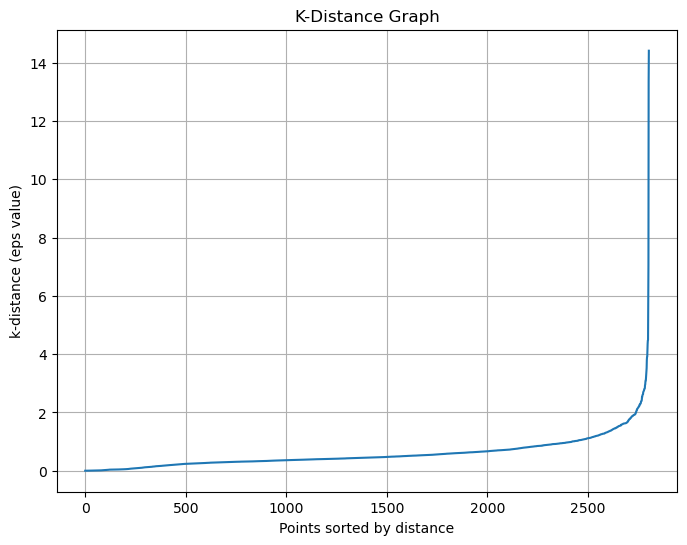

In [98]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [119]:
# 4. Apply DBSCAN with chosen eps and min_samples
# Typically, you choose eps at the "elbow" point in this plot, where the slope changes significantly
chosen_eps = 0.9  # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

In [121]:
clusters = dbscan.fit_predict(X_scaled)
pd.Series(clusters).value_counts()

 1    2265
-1     357
 2     149
 0      33
Name: count, dtype: int64

In [123]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

-0.4373419693254172

In [125]:
X.head(2)

,appearance,goals,minutes played,games_injured,award,highest_value,League_full_Premier League,League_full_Premier Soccer League,dbscan
0,88,0.52879,5957,35,9,85000000,True,False,-1
1,79,0.21978,4914,32,5,130000000,True,False,-1


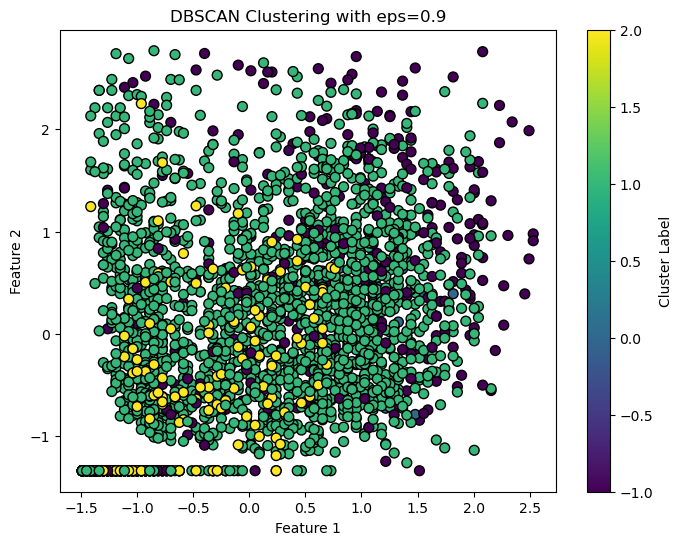

In [127]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [129]:
X['dbscan'] = clusters
X['dbscan'].value_counts()

dbscan
 1    2265
-1     357
 2     149
 0      33
Name: count, dtype: int64

<Axes: xlabel='award', ylabel='appearance'>

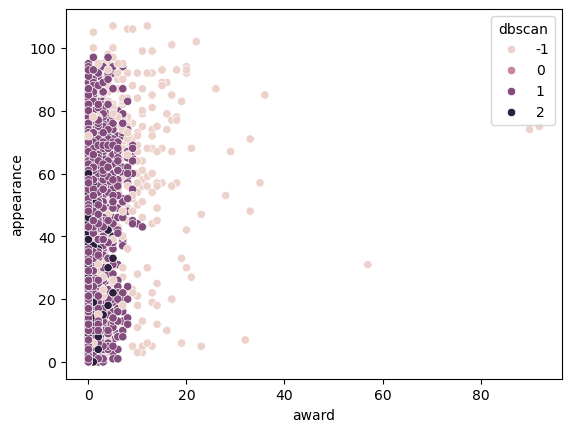

In [131]:
sns.scatterplot(data = X , x = 'award', y = 'appearance', hue = 'dbscan')

<Axes: xlabel='minutes played', ylabel='highest_value'>

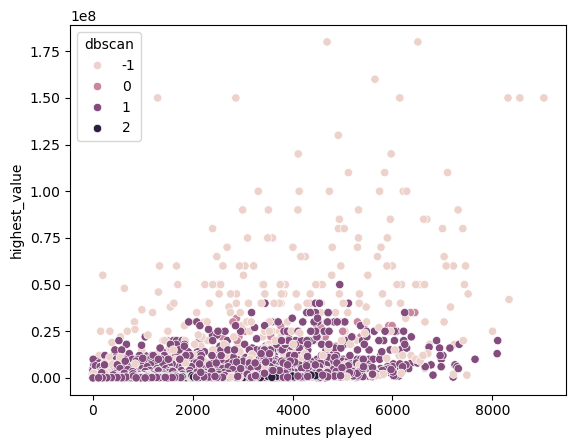

In [133]:
sns.scatterplot(data = X , x = 'minutes played', y = 'highest_value', hue = 'dbscan')